In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets


## Linear Regression Class

In [12]:
class LinearRegression:
    
    def __init__(self, lr=0.001, num_iters = 1000):
        self.lr = lr
        self.num_iters = num_iters
        self.weight = None
        self.bias = None
        
    def fit(self, X, y):
        #Get the number of samples and number of features present in the data.
        num_samples, num_features = X.shape
        
        #Initializing the HyperParameters
        self.weight = np.zeros(num_features)
        self.bias = 0
        
        #Initialize a for loop upto the num_iterations
        for _ in range(self.num_iters):
            y_pred = np.dot(X, self.weight) + self.bias
            
            #Compute the gradients of the Error
            #To calculate the derivatives we need to do the Transpose of X
            dw = (1/num_samples)* np.dot(X.T, (y_pred - y))
            db = (1/ num_samples)*np.sum(y_pred - y)
            
            #Update the parameters
            self.weight = self.weight - self.lr*dw
            self.bias = self.bias - self.lr*db
            
    def predict(self, X):
        y_pred = np.dot(X, self.weight) + self.bias
        return y_pred

## Algorithm Inference

#### Getting the dataset

In [3]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Plotting the dataset

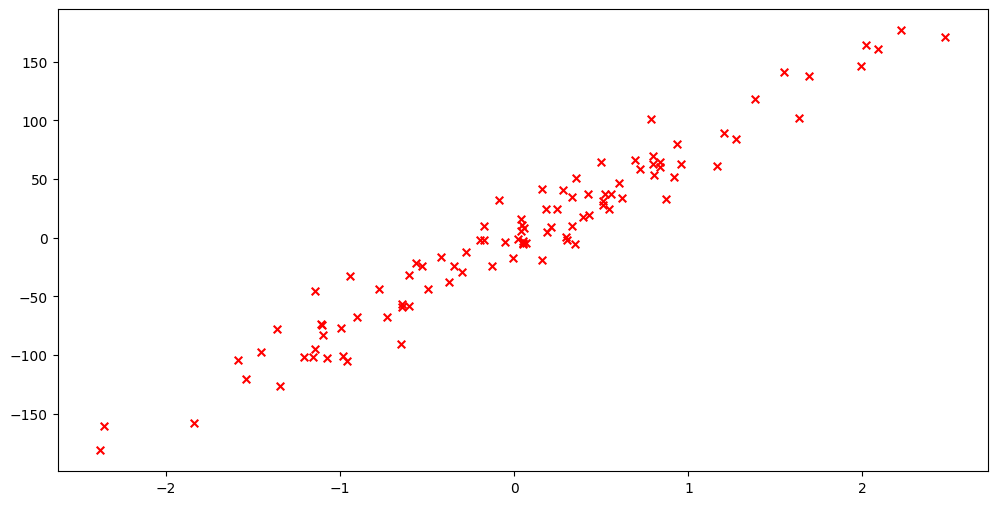

In [4]:
fig = plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], y, color="r", marker="x", s = 30)
plt.show()

#### Using LinearRegression

In [13]:
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

In [14]:
# Create a MSE error function which will calculate the error of our Algorithm
def MSE(pred,test_label):
    return np.mean((test_label-pred)**2)

In [16]:
error = MSE(predictions, y_test)
print("="*25, f"Error = {error}%", "="*25)

========================= Error = 1096.714686791276% =========================


#### Plotting the Result

C:\Users\athar\AppData\Local\Temp\ipykernel_17272\1685506028.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  m2 = plt.scatter(X_test, y_test, cmap=cmap(0.5), s=10)


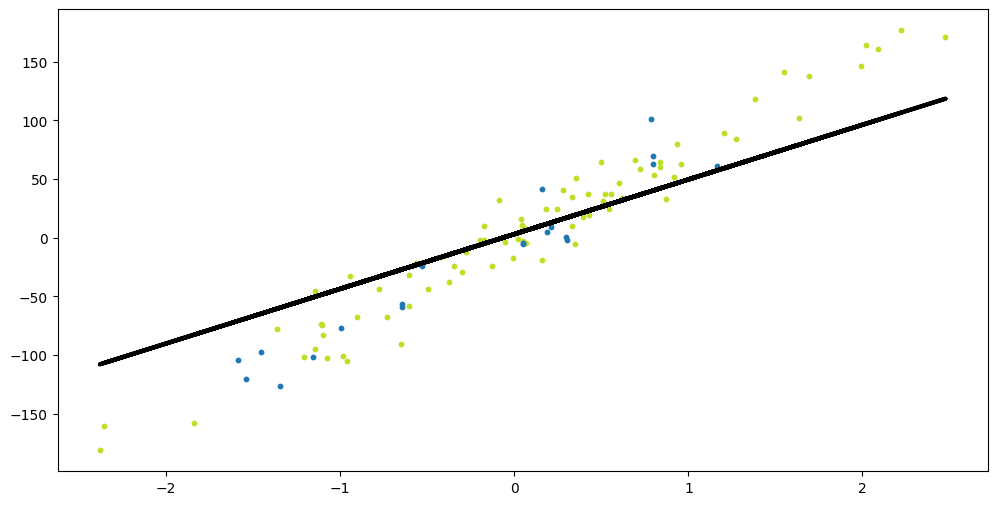

In [27]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(12,6))
m1 = plt.scatter(X_train,y_train, color =cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, cmap=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth = 3, label="Prediction")
plt.show()


- We are not getting a good result as majority of elements are not fitted on the regression line
- We can change the Learning Rate to get a regression line that fits more elements

In [29]:
reg2 = LinearRegression(lr = 0.01)
reg2.fit(X_train, y_train)
predictions2 = reg2.predict(X_test)

In [30]:
error2 = MSE(predictions2, y_test)
print("="*25, f"Error = {error2}%", "="*25)

========================= Error = 325.7197246718065% =========================


C:\Users\athar\AppData\Local\Temp\ipykernel_17272\4032860642.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  m2 = plt.scatter(X_test, y_test, cmap=cmap(0.5), s=10)


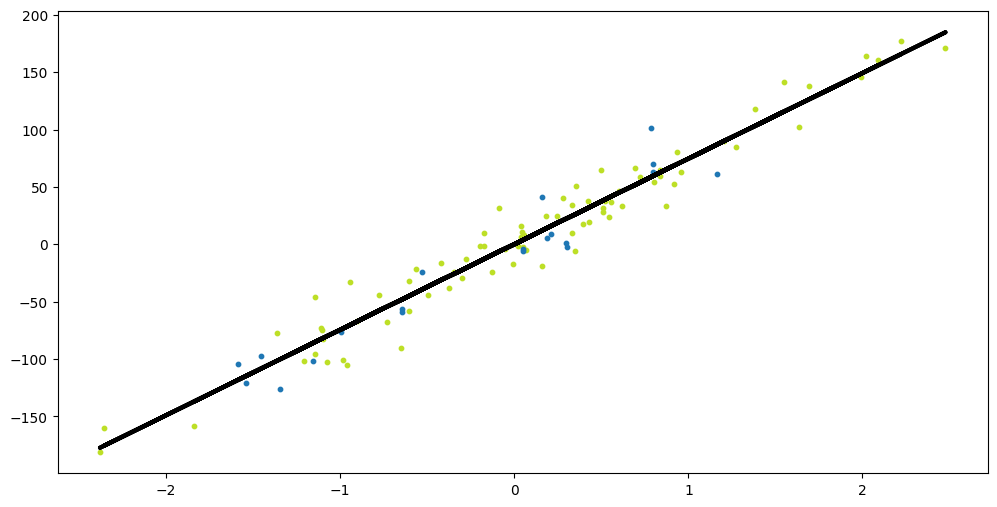

In [31]:
y_pred_line = reg2.predict(X)
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(12,6))
m1 = plt.scatter(X_train,y_train, color =cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, cmap=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth = 3, label="Prediction")
plt.show()